In [205]:
import numpy as np
import pandas as pd
import json

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt

In [206]:
def read_file(path):
    return pd.io.json.read_json(get_path(path))


get_path = lambda path: f'./mapped/{path}.json'
files = ["book", "patron", "rent"]
dfs = dict(zip(files, map(read_file, files)))

## Book that store in 1 library but rented a lot in another library

In [207]:
rent_by_title_library = dfs['rent'].groupby(['title', 'library']).size().sort_values(ascending=False)
rent_by_title_library.name = 'rent_count'

In [208]:
book_by_title_library = dfs['book'].groupby(['title', 'library']).size().sort_values(ascending=False)
book_by_title_library.name = 'book_count'

In [209]:
tl = (pd.concat([rent_by_title_library, book_by_title_library], axis=1)
        .dropna()
    )
print(tl.shape)

(120949, 2)


In [210]:
book_multiple_library = tl[tl.index.get_level_values(0).duplicated(keep=False)].sort_index(level=[0])
book_multiple_library

rent_count  \
title                                              library                                     
"Good coup" gone bad : Thailand's political dev... Arts Library                          3.0   
                                                   Political Science Library             5.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                       7.0   
                                                   Political Science Library             9.0   
"คณะการเมือง" หลังการปฏิวัติสยาม : พลวัต พัฒนาก... Central Library                       2.0   
...                                                                                      ...   
ไอเอ็มซี : การสื่อสารการตลาดแนวใหม่ = The new m... Chula Business School Library         1.0   
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Central Library                       1.0   
                                                   Education Library                     1.0   
ไฮดี้ = Heidi                                      Arts Library                          1.0   
                                                   Central Library                       5.0   

                                                                                  book_count  
title                                              library                                    
"Good coup" gone bad : Thailand's political dev... Arts Library                          3.0  
                                                   Political Science Library             5.0  
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                      10.0  
                                                   Political Science Library            14.0  
"คณะการเมือง" หลังการปฏิวัติสยาม : พลวัต พัฒนาก... Central Library                       2.0  
...                                                                                      ...  
ไอเอ็มซี : การสื่อสารการตลาดแนวใหม่ = The new m... Chula Business School Library         6.0  
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Central Library                       7.0  
                                                   Education Library                     3.0  
ไฮดี้ = Heidi                                      Arts Library                         19.0  
                                                   Central Library                      17.0  

[29410 rows x 2 columns]

In [211]:
book_multiple_library['ratio'] = book_multiple_library['rent_count'] / book_multiple_library['book_count']

In [212]:
high_rent_sort = book_multiple_library[book_multiple_library['ratio'] >= 1].sort_values('rent_count', ascending=False)
high_rent_sort.head()

,,rent_count,book_count,ratio
title,library,,,
ใต้เงาอสูร,Central Library,40.0,40.0,1.0
การต่างประเทศไทยในยุคสงครามเย็น,Political Science Library,30.0,30.0,1.0
ทฤษฎีการเมืองกับความสัมพันธ์ระหว่างประเทศ,Political Science Library,25.0,25.0,1.0
การบริหารงานคลังรัฐบาล,Central Library,24.0,24.0,1.0
เคมี = Chemistry,Science Library,19.0,19.0,1.0


In [213]:
button = widgets.Button(description="Next")
output = widgets.Output()

display(button, output)
index = 0

def on_button_clicked(b):
    with output:
        title = high_rent_sort.iloc[index].name[0]
        book_multiple_library.loc[title]
        display(title)
        display(book_multiple_library.loc[title])
        
def clicked(b):
    global index
    index += 1
    output.clear_output()
    display(button)
    on_button_clicked(b)

button.on_click(clicked)

Button(description='Next', style=ButtonStyle())

Output()

In [232]:
def compare(ser):
    book = ser['book_count'].values
    ratio = ser['ratio'].values
    idx_min = np.argmin(ratio)
    idx_max = np.argmax(ratio)
#     print(book[idx_max], book[idx_min])
    unbalance = book[idx_max] < book[idx_min]
    return unbalance
    
unbalance = book_multiple_library.iloc[:].groupby(level=0).filter(compare)
unbalance.head()

rent_count  \
title                                              library                                 
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                   7.0   
                                                   Political Science Library         9.0   
"คนไท" ไม่ใช่ "คนไทย" แต่เป็นเครือญาติชาติภาษา     Arts Library                      2.0   
                                                   Central Library                   2.0   
"คิด"เปลี่ยน"คุณ" = Creativity wave for innovators Central Library                   3.0   

                                                                              book_count  \
title                                              library                                 
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library                  10.0   
                                                   Political Science Library        14.0   
"คนไท" ไม่ใช่ "คนไทย" แต่เป็นเครือญาติชาติภาษา     Arts Library                      7.0   
                                                   Central Library                  10.0   
"คิด"เปลี่ยน"คุณ" = Creativity wave for innovators Central Library                  10.0   

                                                                                 ratio  
title                                              library                              
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library            0.700000  
                                                   Political Science Library  0.642857  
"คนไท" ไม่ใช่ "คนไทย" แต่เป็นเครือญาติชาติภาษา     Arts Library               0.285714  
                                                   Central Library            0.200000  
"คิด"เปลี่ยน"คุณ" = Creativity wave for innovators Central Library            0.300000

In [242]:
(unbalance
    .reset_index()
    .sort_values(['title', 'library', 'book_count']))

,title,library,rent_count,book_count,ratio
0,"""ข้ออ้าง"" การปฏิวัติ-รัฐประหารในการเมืองไทยสมั...",Central Library,7.0,10.0,0.700000
1,"""ข้ออ้าง"" การปฏิวัติ-รัฐประหารในการเมืองไทยสมั...",Political Science Library,9.0,14.0,0.642857
2,"""คนไท"" ไม่ใช่ ""คนไทย"" แต่เป็นเครือญาติชาติภาษา",Arts Library,2.0,7.0,0.285714
3,"""คนไท"" ไม่ใช่ ""คนไทย"" แต่เป็นเครือญาติชาติภาษา",Central Library,2.0,10.0,0.200000
4,"""คิด""เปลี่ยน""คุณ"" = Creativity wave for innova...",Central Library,3.0,10.0,0.300000
...,...,...,...,...,...
17460,ไอเอ็มซี : การสื่อสารการตลาดแนวใหม่ = The new ...,Chula Business School Library,1.0,6.0,0.166667
17461,ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isa...,Central Library,1.0,7.0,0.142857
17462,ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isa...,Education Library,1.0,3.0,0.333333
17463,ไฮดี้ = Heidi,Arts Library,1.0,19.0,0.052632


In [236]:
titles = unbalance.index.get_level_values(0).unique()

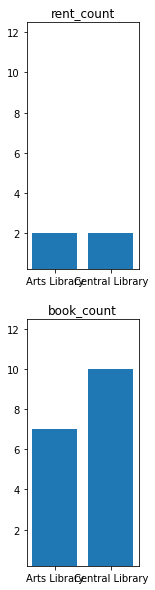

In [238]:
title = titles[1]
x = book_multiple_library.loc[title].index
d = book_multiple_library.loc[title].values
fig, axs = plt.subplots(2)
extent = [d.min(), d.max() * 1.25]
axs[0].bar(x=x, 
           height=d[:,0],
           )
axs[0].set_title('rent_count')
axs[0].set_ylim(*extent)

axs[1].bar(x=x, 
           height=d[:,1])
axs[1].set_title('book_count')
axs[1].set_ylim(*extent)
fig.set_size_inches(2, 10)